In [1]:
#!/usr/bin/python
# -*- coding:utf-8 -*-

import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches

In [2]:
if __name__ == "__main__":
    path = 'iris.data'  # 数据文件路径

In [3]:
    # # # 手写读取数据
    f = file(path)
    x = []
    y = []
    for d in f:
        d = d.strip()
        if d:
            d = d.split(',')
            y.append(d[-1])
            x.append(map(float, d[:-1]))
    print '原始数据X：\n', x
    print '原始数据Y：\n', y
    x = np.array(x)
    print 'Numpy格式X：\n', x
    y = np.array(y)
    print 'Numpy格式Y - 1:\n', y
    y[y == 'Iris-setosa'] = 0
    y[y == 'Iris-versicolor'] = 1
    y[y == 'Iris-virginica'] = 2
    print 'Numpy格式Y - 2:\n', y
    y = y.astype(dtype=np.int)
    print 'Numpy格式Y - 3:\n', y
    print '\n\n============================================\n\n'

原始数据X：
[[5.1, 3.5, 1.4, 0.2], [4.9, 3.0, 1.4, 0.2], [4.7, 3.2, 1.3, 0.2], [4.6, 3.1, 1.5, 0.2], [5.0, 3.6, 1.4, 0.2], [5.4, 3.9, 1.7, 0.4], [4.6, 3.4, 1.4, 0.3], [5.0, 3.4, 1.5, 0.2], [4.4, 2.9, 1.4, 0.2], [4.9, 3.1, 1.5, 0.1], [5.4, 3.7, 1.5, 0.2], [4.8, 3.4, 1.6, 0.2], [4.8, 3.0, 1.4, 0.1], [4.3, 3.0, 1.1, 0.1], [5.8, 4.0, 1.2, 0.2], [5.7, 4.4, 1.5, 0.4], [5.4, 3.9, 1.3, 0.4], [5.1, 3.5, 1.4, 0.3], [5.7, 3.8, 1.7, 0.3], [5.1, 3.8, 1.5, 0.3], [5.4, 3.4, 1.7, 0.2], [5.1, 3.7, 1.5, 0.4], [4.6, 3.6, 1.0, 0.2], [5.1, 3.3, 1.7, 0.5], [4.8, 3.4, 1.9, 0.2], [5.0, 3.0, 1.6, 0.2], [5.0, 3.4, 1.6, 0.4], [5.2, 3.5, 1.5, 0.2], [5.2, 3.4, 1.4, 0.2], [4.7, 3.2, 1.6, 0.2], [4.8, 3.1, 1.6, 0.2], [5.4, 3.4, 1.5, 0.4], [5.2, 4.1, 1.5, 0.1], [5.5, 4.2, 1.4, 0.2], [4.9, 3.1, 1.5, 0.1], [5.0, 3.2, 1.2, 0.2], [5.5, 3.5, 1.3, 0.2], [4.9, 3.1, 1.5, 0.1], [4.4, 3.0, 1.3, 0.2], [5.1, 3.4, 1.5, 0.2], [5.0, 3.5, 1.3, 0.3], [4.5, 2.3, 1.3, 0.3], [4.4, 3.2, 1.3, 0.2], [5.0, 3.5, 1.6, 0.6], [5.1, 3.8, 1.9, 0.4], [4

In [5]:
    # # 使用sklearn的数据预处理
    # df = pd.read_csv(path, header=None)
    # x = df.values[:, :-1]
    # y = df.values[:, -1]
    # print x.shape
    # print y.shape
    # print 'x = \n', x
    # print 'y = \n', y
    # le = preprocessing.LabelEncoder()
    # le.fit(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
    # print le.classes_
    # y = le.transform(y)
    # print 'Last Version, y = \n', y

    # def iris_type(s):
    #     it = {'Iris-setosa': 0,
    #           'Iris-versicolor': 1,
    #           'Iris-virginica': 2}
    #     return it[s]
    #
    # # 路径，浮点型数据，逗号分隔，第4列使用函数iris_type单独处理
    # data = np.loadtxt(path, dtype=float, delimiter=',',
    #                   converters={4: iris_type})

    data = pd.read_csv(path, header=None)
    data[4] = pd.Categorical(data[4]).codes
    # iris_types = data[4].unique()
    # print iris_types
    # for i, type in enumerate(iris_types):
    #     data.set_value(data[4] == type, 4, i)
    x, y = np.split(data.values, (4,), axis=1)
    # print 'x = \n', x
    # print 'y = \n', y
    # 仅使用前两列特征
    x = x[:, :2]
    lr = Pipeline([('sc', StandardScaler()),
                   ('poly', PolynomialFeatures(degree=2)),
                   ('clf', LogisticRegression()) ])
    lr.fit(x, y.ravel())
    y_hat = lr.predict(x)
    y_hat_prob = lr.predict_proba(x)
    np.set_printoptions(suppress=True)
    print 'y_hat = \n', y_hat
    print 'y_hat_prob = \n', y_hat_prob
    print u'准确度：%.2f%%' % (100*np.mean(y_hat == y.ravel()))

y_hat = 
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  2.  2.  1.
  2.  1.  2.  1.  2.  1.  1.  1.  1.  1.  1.  2.  1.  1.  1.  1.  1.  1.
  1.  1.  2.  2.  2.  2.  1.  1.  1.  1.  1.  1.  1.  1.  2.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  2.  1.  2.  1.  2.  2.  1.  2.
  2.  2.  2.  2.  2.  1.  1.  2.  2.  2.  2.  1.  2.  1.  2.  1.  2.  2.
  1.  1.  2.  2.  2.  2.  2.  1.  1.  2.  2.  2.  1.  2.  2.  2.  1.  2.
  2.  2.  1.  2.  2.  1.]
y_hat_prob = 
[[ 0.95636649  0.02229721  0.0213363 ]
 [ 0.82119058  0.13155022  0.0472592 ]
 [ 0.96345857  0.01847458  0.01806685]
 [ 0.96147219  0.01980621  0.0187216 ]
 [ 0.98137946  0.00731619  0.01130436]
 [ 0.97913929  0.00770426  0.01315644]
 [ 0.989982    0.0027725   0.0072455 ]
 [ 0.95288163  0.02514667  0.0219717 ]
 [ 0.95817553  0.02185834  0.01996613]
 [ 0.8803775   0

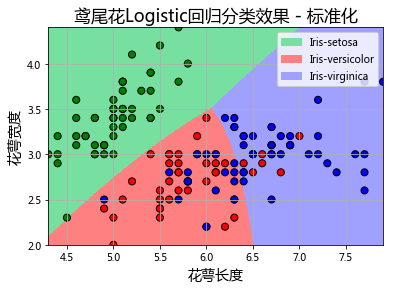

In [6]:
    # 画图
    N, M = 500, 500     # 横纵各采样多少个值
    x1_min, x1_max = x[:, 0].min(), x[:, 0].max()   # 第0列的范围
    x2_min, x2_max = x[:, 1].min(), x[:, 1].max()   # 第1列的范围
    t1 = np.linspace(x1_min, x1_max, N)
    t2 = np.linspace(x2_min, x2_max, M)
    x1, x2 = np.meshgrid(t1, t2)                    # 生成网格采样点
    x_test = np.stack((x1.flat, x2.flat), axis=1)   # 测试点

    # # 无意义，只是为了凑另外两个维度
    # x3 = np.ones(x1.size) * np.average(x[:, 2])
    # x4 = np.ones(x1.size) * np.average(x[:, 3])
    # x_test = np.stack((x1.flat, x2.flat, x3, x4), axis=1)  # 测试点

    # mpl.rcParams['font.sans-serif'] = [u'simHei']
    # mpl.rcParams['axes.unicode_minus'] = False
    cm_light = mpl.colors.ListedColormap(['#77E0A0', '#FF8080', '#A0A0FF'])
    cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
    y_hat = lr.predict(x_test)                  # 预测值
    y_hat = y_hat.reshape(x1.shape)                 # 使之与输入的形状相同
    plt.figure(facecolor='w')
    plt.pcolormesh(x1, x2, y_hat, cmap=cm_light)     # 预测值的显示
    plt.scatter(x[:, 0], x[:, 1], c=y, edgecolors='k', s=50, cmap=cm_dark)    # 样本的显示
    plt.xlabel(u'花萼长度', fontsize=14)
    plt.ylabel(u'花萼宽度', fontsize=14)
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.grid()
    patchs = [mpatches.Patch(color='#77E0A0', label='Iris-setosa'),
              mpatches.Patch(color='#FF8080', label='Iris-versicolor'),
              mpatches.Patch(color='#A0A0FF', label='Iris-virginica')]
    plt.legend(handles=patchs, fancybox=True, framealpha=0.8)
    plt.title(u'鸢尾花Logistic回归分类效果 - 标准化', fontsize=17)
    plt.show()